**Students Performance Analysis**  

  **Import The libraries**

In [24]:
import os
os.environ['STREAMLIT_SERVER_HEADLESS'] = 'true'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\RC\Downloads\student-scores.csv")

In [4]:
print("Student grades/n",df.head())

Student grades/n    id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73            

In [5]:
# Display first 5 rows
df.head()


,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [6]:
df["Average"]=df[["math_score",	"history_score","physics_score","chemistry_score","english_score","geography_score","biology_score"]].mean(axis=1)

In [7]:
print(df)

        id first_name last_name                                    email  \
0        1       Paul     Casey           paul.casey.1@gslingacademy.com   
1        2   Danielle  Sandoval    danielle.sandoval.2@gslingacademy.com   
2        3       Tina   Andrews         tina.andrews.3@gslingacademy.com   
3        4       Tara     Clark           tara.clark.4@gslingacademy.com   
4        5    Anthony    Campos       anthony.campos.5@gslingacademy.com   
...    ...        ...       ...                                      ...   
1995  1996       Alan  Reynolds     alan.reynolds.1996@gslingacademy.com   
1996  1997     Thomas   Gilbert    thomas.gilbert.1997@gslingacademy.com   
1997  1998    Madison     Cross     madison.cross.1998@gslingacademy.com   
1998  1999   Brittany   Compton  brittany.compton.1999@gslingacademy.com   
1999  2000    Natalie     Smith     natalie.smith.2000@gslingacademy.com   

      gender  part_time_job  absence_days  extracurricular_activities  \
0       male  

In [8]:
# Create a single full name column
df = df.assign(FullName = df["first_name"] + " " + df["last_name"])

In [9]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score',
       'Average', 'FullName'],
      dtype='object')

In [10]:
# Pick all score columns
score_columns=[
    "math_score","history_score","physics_score","chemistry_score",
    "english_score","geography_score","biology_score"]
# Calculate row-wise mean (per student)
df["Average_calc"]=df[score_columns].mean(axis=1)
print(df[["FullName","Average","Average_calc"]].head())

            FullName    Average  Average_calc
0         Paul Casey  82.000000     82.000000
1  Danielle Sandoval  91.428571     91.428571
2       Tina Andrews  86.428571     86.428571
3         Tara Clark  78.714286     78.714286
4     Anthony Campos  74.428571     74.428571


In [11]:
# Find the student with the highest average
top_student=df.loc[df["Average"].idxmax()]
print("\nTop Student:")
print(f"Name: {top_student['FullName']}, Average Score: {top_student['Average']:.2f}")



Top Student:
Name: Lisa Mitchell, Average Score: 96.14


In [12]:
# Find the student with the Lowest average
Lower_student=df.loc[df["Average"].idxmin()]
print("\nLower Student:")
print(f"Name: {Lower_student['FullName']}, Average Score: {Lower_student['Average']:.2f}")



Lower Student:
Name: Thomas Scott, Average Score: 59.14


**Average Score**

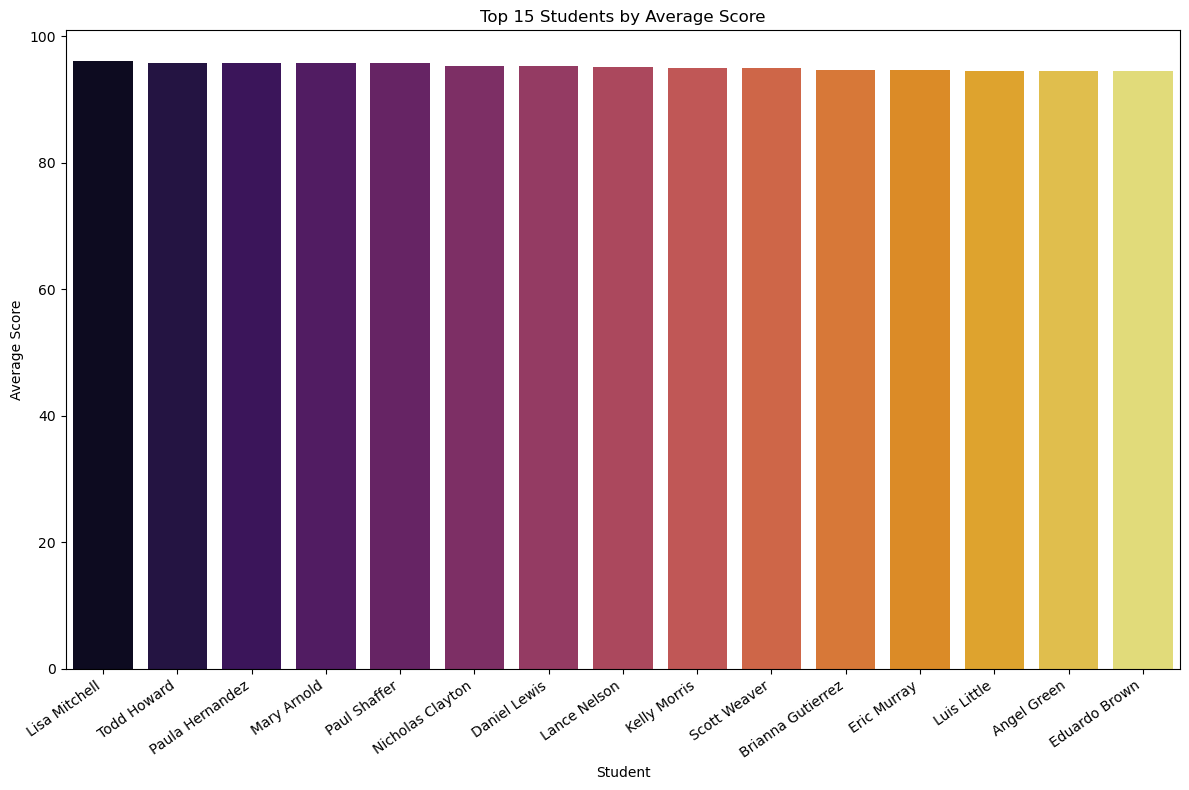

In [13]:
top_students=df.sort_values("Average",ascending=False).head(15)
plt.figure(figsize=(12,8))
sns.barplot(x="FullName",y="Average",hue="FullName",data=top_students,palette="inferno",legend=False)
plt.xticks(rotation=35, ha="right")
plt.title("Top 15 Students by Average Score")
plt.ylabel("Average Score")
plt.xlabel("Student")
plt.tight_layout()
plt.show()

**Meam of Each Subject**

In [14]:
sub_mean=df[score_columns].mean()

C:\Users\RC\AppData\Local\Temp\ipykernel_8772\2484924486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_mean.index,y=sub_mean.values,palette="plasma")


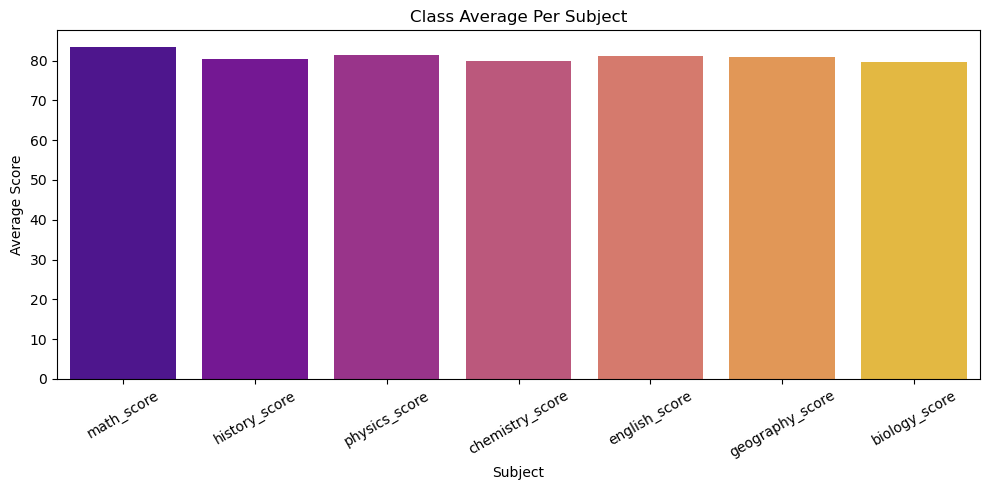

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=sub_mean.index,y=sub_mean.values,palette="plasma")
plt.xticks(rotation=30)
plt.title("Class Average Per Subject")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

**Individual Score**

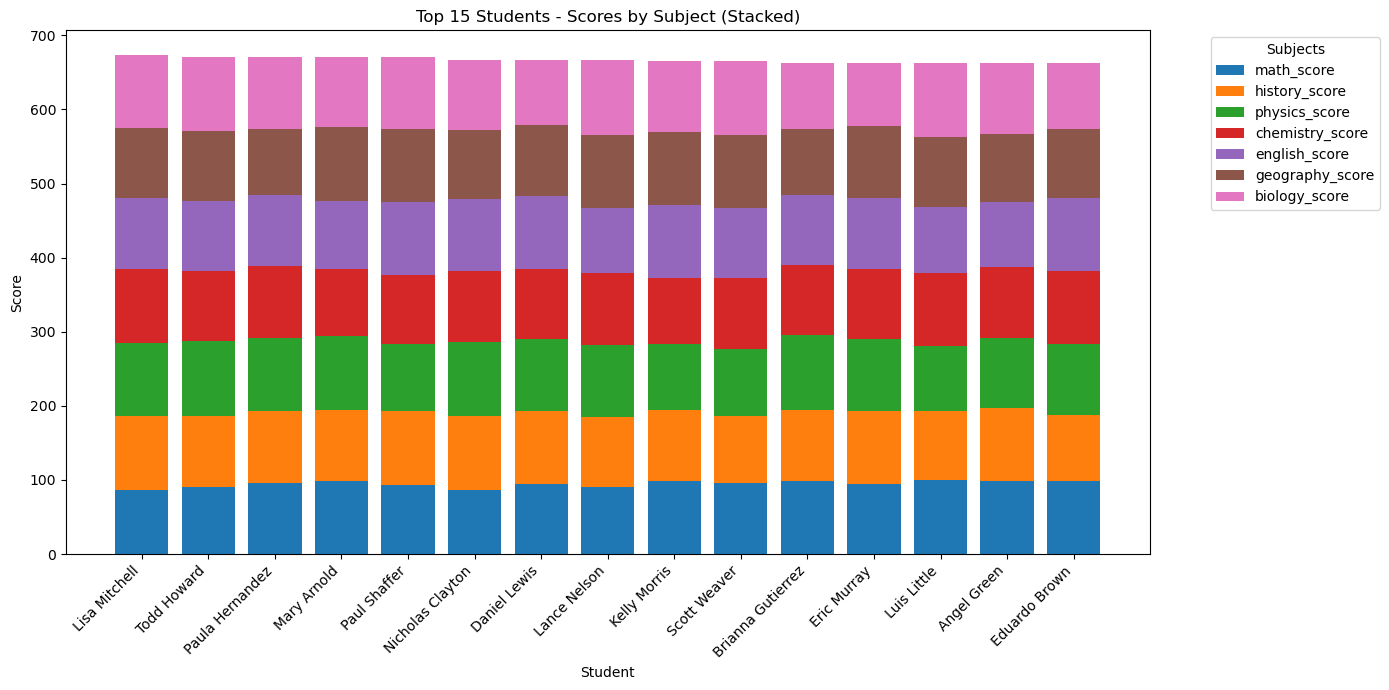

In [16]:
# Pick score columns
score_cols = [
     "math_score","history_score","physics_score","chemistry_score",
    "english_score","geography_score","biology_score"]

# Create FullName column
df["FullName"] = df["first_name"] + " " + df["last_name"]

# Select top 20 students by average
top_students = df.sort_values("Average", ascending=False).head(15)
top_students = top_students.set_index("FullName")

# Plot stacked bar chart
plt.figure(figsize=(14,7))
bottom = [0]*len(top_students)

for subject in score_cols:
    plt.bar(top_students.index, top_students[subject], bottom=bottom, label=subject)
    bottom = [i+j for i,j in zip(bottom, top_students[subject])]

plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.xlabel("Student")
plt.title("Top 15 Students - Scores by Subject (Stacked)")
plt.legend(title="Subjects", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Score of Top Student**

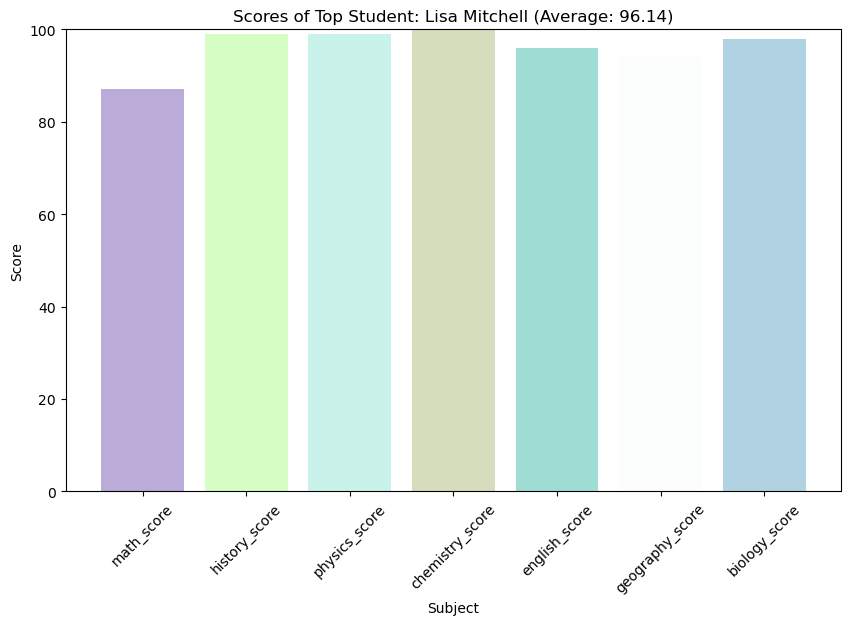

In [17]:

# Get top student scores
top_scores = top_student[score_cols]

# Plot bar chart
plt.figure(figsize=(10,6))
colors = np.random.rand(len(top_scores), 4)
plt.bar(top_scores.index, top_scores.values, color=colors)
plt.ylim(0, 100)  # assuming scores are out of 100
plt.title(f"Scores of Top Student: {top_student['FullName']} (Average: {top_student['Average']:.2f})")
plt.ylabel("Score")
plt.xlabel("Subject")
plt.xticks(rotation=45)
plt.show()


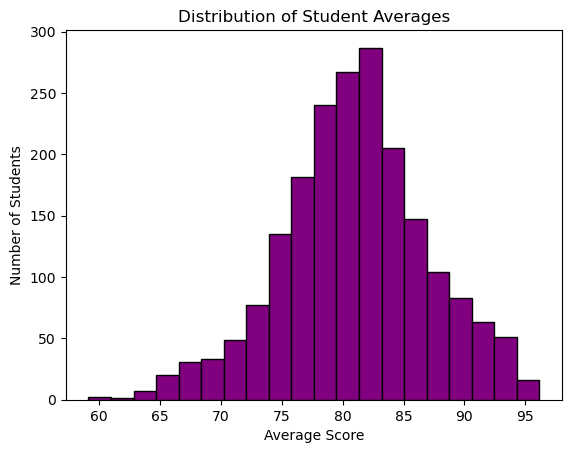

In [18]:
# Histogram of student averages
plt.hist(df["Average"], bins=20, color="purple", edgecolor="black")
plt.title("Distribution of Student Averages")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.show()

>>**THE END**